## This assignment may be worked individually or in pairs. 
## Enter your name/names here:
    

In [1]:
#name here 
#name1: Peijie Yang
#eid1: py2554
#name2: Pengdi Xia
#eid2: px353

# Assignment 2: Naive Bayes and KNN classifier

In this assignment you'll implement the Naive Bayes and KNN classifier to classify patients as either having or not having diabetic retinopathy. For this task we'll be using the same Diabetic Retinopathy data set which was used in the previous assignment on decision trees. The implementation details are up to you but, generally it is a good idea to divide your code up into helper functions.

In [2]:
# Standard Headers
# You are welcome to add additional headers if you wish
# EXCEPT for scikit-learn... You may NOT use scikit-learn for this assignment!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log
from random import shuffle
global preList
from queue import PriorityQueue

In [3]:
class DataPoint:
    def __str__(self):
        return "< " + str(self.label) + ": " + str(self.features) + " >"
    def __init__(self, label, features):
        self.label = label # the classification label of this data point
        self.features = features

Read the data from a CSV file. You may either put it into a list of `DataPoints` as you did on the previous assignment (class provided above), or you may choose to store it any any format you wish, like a Pandas dataframe, or any other format you'd like.

In [15]:
def get_data(filename):
    data = []
#     your code goes here
    rawData = pd.read_csv(filename, header=None)
    for i in rawData.itertuples():
        features = []
        for j in i[1:-1]:
            features.append(j)
        
        dp = DataPoint(i[-1], features)
        data.append(dp)
    
    return data

## Part 1: Naive Bayes Classifier

Naive Bayes (NB) classifier is a simple probabilistic classifier that is based on applying the Bayes' theorem and assumes a strong (naive) independence between features. The Diabetic Retinopath data set contains both categorical and continuous features. Dealing with categorical features has been already been discussed in detail in class. Continuous attributes, on the other hand, are more interesting to handle. Most commonly, this is done by assuming normal probability distribution over the feature values or by binning the attribute values in a fixed number of bins. In this assignment you'll be implementing the binning approach. For each continuous attribute, you'll construct 3 equal sized bins. For example, feature 5 ranges from `[1 - 120]` the 3 bins that you'll construct will be `[1 - 40]`, `[41 - 80]`, `[81 - 120]`.

Q1. Implement a Naive Bayes classifier. Measure the accuracy of your classifier using 5-fold cross validation and display the confusion matrix. Also print the precision and recall for class label 1 (patients that have been diagnosed with the disease).

In [16]:
def countOnes(train_set):
    ones = 0
    for y in range(len(train_set)):
        if train_set[y].label == 1:
            ones+=1
    return ones

In [17]:

def helper2(train_set):
    preList = []
    for i in range (19):
        if i != 0 and i !=1 and i !=18 :
            attList = []
            yesLess = 0
            yesMid = 0
            yesHigh = 0
            noLess = 0
            noMid = 0
            noHigh = 0
            
            yesLessRate = 0
            yesMidRate = 0
            yesHighRate = 0
            noLessRate = 0
            noMidRate = 0
            noHighRate = 0
            
            length = len(train_set)
            sortedset = sorted(train_set,key=lambda x: x.features[i])
            
            minNum = sortedset[0].features[i]
            maxNum = sortedset[len(sortedset)-1].features[i]
            
            oneThird = ((maxNum - minNum)*(1/3))
            oneThirdLength = 0
            count1 = 0
            while(sortedset[count1].features[i] <= oneThird):
                count1+=1
                oneThirdLength+=1
                
            count2 = 0
            twoThirdLength = 0
            twoThird = ((maxNum - minNum)*(2/3))
            while(sortedset[count2].features[i] <= twoThird):
                count2+=1
                twoThirdLength+=1
            
            defaultOnes = countOnes(train_set)
            defaultZeros = len(sortedset) - defaultOnes
            
            yesLess = countOnes(sortedset[:oneThirdLength])
            if (yesLess == 0):
                yesLessRate = 1/(defaultOnes+1)
                noLessRate = (noLess+1)/(defaultZeros+1)
            else: 
                yesLessRate = yesLess/(defaultOnes)
            yesMid = countOnes(sortedset[oneThirdLength: twoThirdLength ])
            if (yesMid == 0):
                yesMidRate = 1/(defaultOnes+1)
                noMidRate = (noMid+1)/(defaultZeros+1)
            else: 
                yesMidRate = yesMid/(defaultOnes)
            yesHigh = countOnes(sortedset[twoThirdLength:])
            if (yesHigh == 0):
                yesHighRate = 1/(defaultOnes+1)
                noHighRate = (noHigh+1)/(defaultZeros+1)
            else: 
                yesHighRate = yesHigh/(defaultOnes)
            
            
            noLess = ((len(sortedset[:oneThirdLength])-yesLess))
            if (noLess == 0):
                noLessRate = 1/(defaultZeros+1)
                yesLessRate = (yesLess+1)/(defaultOnes+1)
            else: 
                noLessRate = noLess/(defaultZeros)
            noMid = ((len(sortedset[oneThirdLength: twoThirdLength ]))-yesMid)
            if (noMid == 0):
                noMidRate = 1/(defaultZeros+1)
                yesMidRate = (yesMid+1)/(defaultOnes+1)
            else: 
                noMidRate = noMid/(defaultZeros)
            noHigh = ((len(sortedset[twoThirdLength:]))-yesHigh)
            if (noHigh == 0):
                noHighRate = 1/(defaultZeros+1)
                yesHighRate = (yesHigh+1)/(defaultOnes+1)
            else: 
                noHighRate = noHigh/(defaultZeros)
            
            attList = [oneThird, twoThird, yesLessRate, yesMidRate, yesHighRate, noLessRate, noMidRate, noHighRate,defaultOnes/len(train_set), defaultZeros/len(train_set)]            
            #print(oneThird, twoThird, yesLessRate, yesMidRate, yesHighRate, noLessRate, noMidRate, noHighRate,defaultOnes/len(train_set), defaultZeros/len(train_set))
            preList.append(attList)
        else: 
            yesOne = 0
            yesZero = 0
            noOne = 0
            noZero = 0
            
            yesOneRate = 0
            yesZeroRate = 0
            noOneRate = 0
            noZeroRate = 0
            
            for x in range(len(train_set)):
                if(train_set[x].features[i]== 1):
                    if(train_set[x].label == 1):
                        yesOne+=1
                    else:
                        noOne +=1
                else:
                    if(train_set[x].label == 1):
                        yesZero+=1
                    else:
                        noZero+=1
            totalYes = countOnes(train_set)
            totalNo = len(train_set)-totalYes
            if (yesOne == 0):
                yesOneRate = 1/(totalYes+1)
                noOneRate = (noOne+1)/(totalNo+1)
            else: 
                yesOneRate = yesOne/(totalYes)
                
            if (yesZero == 0):
                yesZeroRate = 1/(totalYes+1)
                noZeroRate = (noZero+1)/(totalNo+1)
            else: 
                yesZeroRate = yesZero/(totalYes)
                
            if (noOne == 0):
                noOneRate = 1/(totalNo+1)
                yesOneRate = (yesOne+1)/(totalYes+1)
            else:
                noOneRate = noOne/(totalNo)
                
            if (noZero == 0):
                noZeroRate = 1/(totalNo+1)
                yesZeroRate = (yesZero+1)/(totalYes+1)
            else: 
                noZeroRate = noZero/(totalNo)
            preList.append([yesOneRate, yesZeroRate,noOneRate,noZeroRate])
    return preList


In [18]:
# your code goes here
d = get_data("messidor_features.txt")
split = 5
size = int (len(d)/5)
total = 0
accuracy = 0

for x in range(split):
    
# partition data into train_set and test_set
    train_set = d[:x*size] + d[(x+1)*size:]
    test_set = d[x*size:(x+1)*size]

    print ('Training set size:', len(train_set))
    print ('Test set size    :', len(test_set))

    # create the decision tree
    preList = helper2(train_set)
    result = 0
    correct = 0
    defaultOnes = countOnes(train_set)
    defaultZeros = len(train_set) - defaultOnes
    TN = 0
    TP = 0
    FN = 0
    FP = 0        
            
    for y in range(len(test_set)):
        numYes = 1
        numNo = 1
        
        for z in range(19):
            
            if z != 0 and z !=1 and z != 18:
                if test_set[y].features[z] < preList[z][0]:
                    numYes = numYes*preList[z][2]
                    numNo = numNo*preList[z][5]
                elif(test_set[y].features[z] < preList[z][1] and test_set[y].features[z] >= preList[z][0]):
                    numYes = numYes*preList[z][3]
                    numNo = numNo*preList[z][6]
                else: 
                    numYes = numYes*preList[z][4]
                    numNo = numNo*preList[z][7]
            else: 
                if test_set[y].features[z] == 1:
                    numYes = numYes*preList[z][0]
                    numNo = numNo*preList[z][2]
                else:
                    numYes = numYes*preList[z][1]
                    numNo = numNo*preList[z][3]
                    
        numYes = numYes * (defaultOnes/len(test_set))
        numNo = numNo * (defaultZeros/len(test_set))
        
        
        if numYes > numNo: 
            result = 1
        else:
            result = 0
        if test_set[y].label == 1 and result == 1 : 
            TP += 1 
        elif test_set[y].label == 1 and result == 0: 
            FN += 1
        elif test_set[y].label == 0 and result == 1:
            FP += 1
        else: TN  += 1
    # calculate the accuracy of the tree
    total = total +((TN+TP)/len(test_set) * 100.0)
    print ('The accuracy on the test set is ', str((TN+TP)/len(test_set) * 100.0))
    print ('                    prediction class')
    print ('                         +       -')
    print ('actual class       +    '+str(TP)+'     '+str(FN))
    print ('                   -    '+str(FP)+'     '+str(TN))
    print ('prec(+) = ' + str((TP/(TP+FP))))
    print ('prec(+) = ' + str((TN/(TN+FN))))
    print ('recall(+) = ' + str((TP/(TP+FN))))
    print ('recall(-) = ' + str((TP/(FP+TN))))
    #t.printTree()
print('The average accuracy on the test set is ', str((total/split)))

Training set size: 921
Test set size    : 230
The accuracy on the test set is  64.34782608695652
                    prediction class
                         +       -
actual class       +    71     57
                   -    25     77
prec(+) = 0.7395833333333334
prec(+) = 0.5746268656716418
recall(+) = 0.5546875
recall(-) = 0.696078431372549
Training set size: 921
Test set size    : 230
The accuracy on the test set is  62.17391304347826
                    prediction class
                         +       -
actual class       +    71     52
                   -    35     72
prec(+) = 0.6698113207547169
prec(+) = 0.5806451612903226
recall(+) = 0.5772357723577236
recall(-) = 0.6635514018691588
Training set size: 921
Test set size    : 230
The accuracy on the test set is  53.91304347826087
                    prediction class
                         +       -
actual class       +    58     62
                   -    44     66
prec(+) = 0.5686274509803921
prec(+) = 0.515625
recall(+) =


## Part 2: K Nearest Neighbor (KNN) Classifier

The KNN classifier consists of two stages:-
- In the training stage, the classifier takes the training data and simply memorizes it
- In the test stage, the classifier compares the test data with the training data and simply returns the maximum occuring label of the k nearest data points.

The distance calculation method is central to the algorithm, typically Euclidean distance is used but other distance metrics like Manhattan distance can also be used. In this assignment you'll be implementing the classifier using the Euclidean distance metric. It is important to note that, Euclidean distance is very sensitive to the scaling of different attributes hence, before you can build your classifier you have to normalize the values of each feature in the data set.

Q2. Normalize the dataset so that each feature value lies between `[0-1]`.

In [19]:
# your code goes here
def normalizeData(data):
    for i in range(18):
        sorteddata = sorted(data,key=lambda x: x.features[i])
        maxData = sorteddata[len(sorteddata)-1].features[i] 
        minData = sorteddata[0].features[i]
        for j in range (len(data)):
            sorteddata[j].features[i] = (sorteddata[j].features[i] - minData)/(maxData - minData)
    return sorteddata

Q3. Build your KNN classifier. 

In [20]:
# your code goes here
def calcdistance(train_data, test_data):
    dist=0.0
    for i in range(19):
        dist+=(test_data.features[i]- train_data.features[i])**2
    return dist**0.5

In [21]:
def knn(train_set, test_data, max_k):
    distlist=[]
    resultList = []
    result = 0
    for i in range (len((train_set))):
        distlist.append([i,calcdistance(train_set[i],test_data)])
    distlist=sorted(distlist, key=lambda x:x[1], reverse=False)
    for k in range(1,max_k,2):
        result=distlist[:k]
        sum1=0.0
        for i in range (len(result)):#i=k
            sum1 += train_set[result[i][0]].label
        
        if(k-sum1>sum1):
            result = 0
        else:
            result = 1
        resultList.append(result)
    return resultList
    

Q4. Find the best value of k using 5-fold cross validation. In each fold of CV, divide your data into a training set and a validation set. Try k ranging from 1 to 10 and plot the accuracies using 5-fold CV. Use this plot to identify the best value of k (provide reasoning).

In [22]:
# your code goes here
def getbestk(train_set, max_k):
    error=0
    amount=1
    result=0
    valid_size = int (len(train_set)/5)
    maxNum = 0
    array = [0,0,0,0,0]
    container = []
    for i in range(5):
        error=0
        train_set2 = train_set[:i*valid_size]+train_set[(i+1)*valid_size:]
        valid_set = train_set[i*valid_size:(i+1)*valid_size]
        for j in range (len(valid_set)):
            predictList = knn(train_set2, valid_set[j], max_k)
            for k, pred in enumerate(predictList):
                if pred == valid_set[j].label:
                    array[k] +=1 
        array = [x/len(valid_set) for x in array]
        container.append(array)
        plt.plot([x for x in range(1,10,2)], array)
    
    for j in range(len(container)):
        count = 0
        for k in range(len(container[0])):
            count += container[k][j]
        if count > maxNum:
            maxNum = count
            result = j
            
    plt.show()
    return result*2+1

Q5. Now measure the accuracy of your classifier using 5-fold cross validation. In each fold of this CV, divide your data into a training set and a test set. The training set should get sent through your code for Q4, resulting in a value of k to use. Using that k, calculate an accuracy on the test set. You will average the accuracy over all 5 folds to obtain the final accuracy measurement. Print the accuracy as well as the precision and recall for class label 1 (patients that have been diagnosed with the disease).

In [25]:
# your code goes here
import time
def accuracy(d):
    size = int (len(d)/5)
    total = 0
    for x in range(5):
        TN = 0
        TP = 0
        FN = 0
        FP = 0
        k = 0
        result = 0
        train_set = d[:x*size] + d[(x+1)*size:]
        test_set = d[x*size:(x+1)*size]
        start = time.time()
        k = getbestk(train_set,10)
        end = time.time()
        print('k = '+str(k)+', takes '+str(end-start)+'s')
        correct = 0
        for z in range(len(test_set)):
            prediction = knn(train_set,test_set[z],k)
            if test_set[z].label == prediction[-1]:
                correct +=1 
            if test_set[z].label == 1 and prediction[-1] ==1:
                TP +=1 
            elif test_set[z].label == 0 and prediction[-1] ==0:
                TN += 1
            elif test_set[z].label == 0 and prediction[-1] ==1:
                FP += 1
            else:
                FN += 1
        accuracy = correct / len(test_set)
        total += accuracy
        print("accuracy" + str(x)+": " + str(accuracy))
        
        print ('The accuracy on the test set is ', str((TN+TP)/len(test_set) * 100.0))
        print ('                    prediction class')
        print ('                         +       -')
        print ('actual class       +    '+str(TP)+'     '+str(FN))
        print ('                   -    '+str(FP)+'     '+str(TN))
        print ('prec(+) = ' + str((TP/(TP+FP))))
        print ('prec(+) = ' + str((TN/(TN+FN))))
        print ('recall(+) = ' + str((TP/(TP+FN))))
        print ('recall(-) = ' + str((TP/(FP+TN))))
            
    print('The average accuracy on the test set is ', str((total/5)))

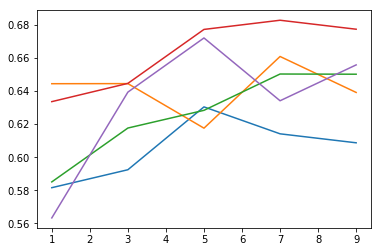

k = 7, takes 8.741676092147827s
accuracy0: 0.6304347826086957
The accuracy on the test set is  63.04347826086957
                    prediction class
                         +       -
actual class       +    83     44
                   -    41     62
prec(+) = 0.6693548387096774
prec(+) = 0.5849056603773585
recall(+) = 0.6535433070866141
recall(-) = 0.8058252427184466


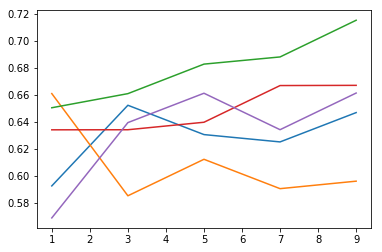

k = 9, takes 8.533097267150879s
accuracy1: 0.6565217391304348
The accuracy on the test set is  65.65217391304347
                    prediction class
                         +       -
actual class       +    71     60
                   -    19     80
prec(+) = 0.7888888888888889
prec(+) = 0.5714285714285714
recall(+) = 0.5419847328244275
recall(-) = 0.7171717171717171


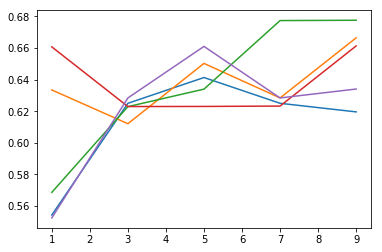

k = 9, takes 7.353930950164795s
accuracy2: 0.591304347826087
The accuracy on the test set is  59.130434782608695
                    prediction class
                         +       -
actual class       +    67     47
                   -    47     69
prec(+) = 0.5877192982456141
prec(+) = 0.5948275862068966
recall(+) = 0.5877192982456141
recall(-) = 0.5775862068965517


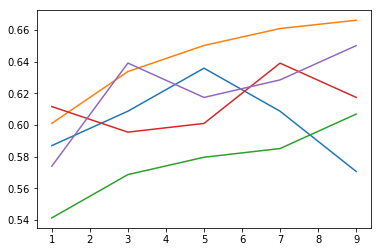

k = 9, takes 8.140082359313965s
accuracy3: 0.6434782608695652
The accuracy on the test set is  64.34782608695652
                    prediction class
                         +       -
actual class       +    70     45
                   -    37     78
prec(+) = 0.6542056074766355
prec(+) = 0.6341463414634146
recall(+) = 0.6086956521739131
recall(-) = 0.6086956521739131


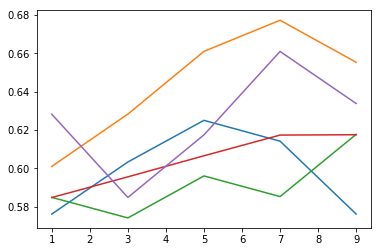

k = 7, takes 9.53495717048645s
accuracy4: 0.6695652173913044
The accuracy on the test set is  66.95652173913044
                    prediction class
                         +       -
actual class       +    79     44
                   -    32     75
prec(+) = 0.7117117117117117
prec(+) = 0.6302521008403361
recall(+) = 0.6422764227642277
recall(-) = 0.7383177570093458
The average accuracy on the test set is  0.6382608695652174


In [27]:
rawData = get_data("messidor_features.txt")
data = rawData.copy() 
d = normalizeData(data)
accuracy(d)

### To explore further:

1) Use scikit-learn's NearestNeighbor classifier to classify the data. Compare those results to your own. The documentation can be found [here](http://scikit-learn.org/stable/modules/neighbors.html), specifically section 1.6.2 and the link to the [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

2) Use scikit-learn's Naive Bayes classifier to classify the data. Compare those results to your own. The documentation is found [here](http://scikit-learn.org/stable/modules/naive_bayes.html), specifically section 1.9.2 and the link to [MultinomialNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB). You will want to bin the continuous attributes, as you did above, and consider each bin to be a categorical value for that attribute. For example, feature 5 ranges from [1 - 120], and the 3 bins that you'll construct will be [1 - 40], [41 - 80], [81 - 120]. You can think of this as saying that feature 5 can take 1 of 3 values: low, med, or high. With binning, you have transformed all of your features into categorical features and the MultinomialNB version of Naive Bayes is what should be used for all categorical data. 